<a href="https://colab.research.google.com/github/crdguez/mat4ac/blob/master/notebooks/est_evaluacion_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Si lo ejecutas desde google colab
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive/Curso\ Actual/4ac/notebooks
!pwd
#os.chdir('/content/drive/Curso Actual')



ModuleNotFoundError: No module named 'google.colab'

In [1]:
# Importamos librerías
#from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
#import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline

In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: lightyellow'
    return 'color: %s ; font-size: 20px ; font-weight: bold' % color 

def color_media(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val < 5 or val =="") else 'black; background: burlywood'
    return 'color: %s ; font-size: 14px ; font-weight: bold'  % color 

def color_suspensos(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val > 0 or val =="") else 'black; background: darkkhaki'
        
    return 'color: %s ; font-weight: bold ; font-size: 14px' % color 

def evaluaciones_anteriores(val):      
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        #color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: ghostwhite'
        color = 'blue ; background: azure'
    
    return 'color: %s ; font-size: 8px ; font-weight: lighter' % color 
     

In [4]:
# Importamos los datos

evaluaciones_a_incluir = 1

inicio_nombre_fichero = 'importado'

def actilla(fich='importado2', eval=2):
    fichero = fich + '.csv'
    pre_actilla = pd.read_csv(fichero, index_col=False)
    pre_actilla = pre_actilla.drop([col for col in pre_actilla if col.startswith('Unna')], axis=1)
    pre_actilla = pre_actilla.drop("Nº MNS", axis = 1)
    pre_actilla = pd.melt(pre_actilla, id_vars=["Nº","Apellidos, Nombre"], var_name="Asignatura", value_name="Nota")
    pre_actilla = pre_actilla[pre_actilla['Nota'].notna()]
    pre_actilla = pre_actilla.copy()
    pre_actilla['Eval'] = eval
    pre_actilla.Asignatura=pre_actilla.Asignatura.str.replace('\n', ' ')
    return pre_actilla
    

def concatenar_actillas(inicio_nombre_fichero='importado', evaluaciones_a_incluir=2): 
    return pd.concat([actilla(inicio_nombre_fichero + str(n + 1), n + 1) for n in range(evaluaciones_a_incluir)])

actilla_final = concatenar_actillas(inicio_nombre_fichero,evaluaciones_a_incluir)
actilla_final = actilla_final.rename(columns={'Apellidos, Nombre':'Alumno'})
actilla_final = actilla_final[['Alumno','Asignatura','Eval','Nota']]
actilla_final['Suspenso']=0

# Si sale algún no presentado hay que ejecutar lo siguiente
#actilla_final = actilla_final.drop(actilla_final[actilla_final.Nota == 'NP'].index)

actilla_final.Nota = pd.to_numeric(actilla_final.Nota)
actilla_final.loc[actilla_final['Nota'] < 5, 'Suspenso'] = 1
actilla_final.Nota = actilla_final.Nota.astype(int)

ultima_evaluacion = actilla_final.Eval.max()

actilla_final.to_csv('ev{}.csv'.format(evaluaciones_a_incluir),index=False)
actilla_final=actilla_final[actilla_final.Eval <= evaluaciones_a_incluir]
actilla_final

,Alumno,Asignatura,Eval,Nota,Suspenso
0,"Aparicio Maella, Ángel",ARE,1,8,0
1,"Arcas Sánchez, Daniel",ARE,1,8,0
2,"Cabeza Roche, Andrea",ARE,1,9,0
3,"Campo García, Paula",ARE,1,10,0
4,"Damasceno Ossó, Óscar",ARE,1,7,0
...,...,...,...,...,...
616,"Raja Herranz, Laura",VET,1,10,0
617,"Sánchez Paz, Daniel",VET,1,10,0
618,"Sanz Bona, Marcos",VET,1,10,0
619,"Villanueva Tejedor, Daniella",VET,1,5,0


In [80]:
# ###### Informe sábana (df5 y actilla_estilada)

# df = actilla_final[actilla_final.Eval <= ultima_evaluacion]
# df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval')
# df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').rename(columns={'Nota':'NM'})
# df3 = df.groupby(['Asignatura','Eval'])[['Nota']].mean()

# df4 = pd.concat([df1,df3.T.rename(index={'Nota': 'Media'})])

# df5 = pd.concat([df4,df2], axis=1, sort=False)
# df6 = actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Suspenso']].sum().unstack('Eval').rename(columns={'Suspenso':'MNS'})
# df5 = pd.concat([df5,df6], axis=1, sort=False)


# # calculamos la media de las medias de las notas y la suma total de suspensos
# df5.iloc[-1:,-2:-1]=df2.mean()[0]
# df5.iloc[-1:,-1:]=df6.sum()[0]


# # le damos estilo
# actilla_estilada = df5.style.set_precision(0) \
#     .format("{:.1f}",subset=(df5.index[-1:],df5.columns[:-1])) \
#     .format("{:.1f}",subset=(df5.index,df5.columns[-2:-1])) \
#     .format("{:.0f}",subset=(df5.index,df5.columns[-1:0])) \
#     .applymap(color_negative_red).highlight_null("white") \
#     .applymap(color_media, subset=(df5.index[-1:],df5.columns)) \
#     .applymap(color_media, subset=(df5.index,['NM'])) \
#     .applymap(color_suspensos, subset=(df5.index,['MNS'])) \
#     .applymap(evaluaciones_anteriores, subset=(df5.index,df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \
#     .set_table_styles([{'selector': 'td','props': [('border', '1px solid black'),('text-align', 'center')]}, \
#                        {'selector': 'tr','props': [('border', '1px solid black')]}, \
#                        {'selector': 'th','props': [('text-align', 'center'),('font-size','9px')]}
#                       ] \
#                      ) \
#     .set_na_rep('-')

# df5
# actilla_estilada

In [20]:
###### Informe sábana (df5 y actilla_estilada)

#df = actilla_final[actilla_final.Eval <= ultima_evaluacion]
df = actilla_final[actilla_final.Eval.isin([ultima_evaluacion, ultima_evaluacion -1]) ]

df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval')
df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').rename(columns={'Nota':'NM'})
df3 = df.groupby(['Asignatura','Eval'])[['Nota']].mean()

df4 = pd.concat([df1,df3.T.rename(index={'Nota': 'Media'})])

# #calculamos el número de suspensos por asignatura y porcentaje

df7=df.groupby(['Asignatura','Eval'])[['Suspenso']].aggregate(['sum','count'])
df7[('Suspenso','porc')]=df7[('Suspenso','sum')]/df7[('Suspenso','count')]
df7.columns=df7.columns.get_level_values(1)
df7.T

df4 = pd.concat([df4,df7[['sum','porc']].T.rename(index={'sum':'nsusp','porc':'%'})], sort=False)

df5 = pd.concat([df4,df2], axis=1, sort=False)
df6 = actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Suspenso']].sum().unstack('Eval').rename(columns={'Suspenso':'MNS'})
df5 = pd.concat([df5,df6], axis=1, sort=False)


# # calculamos la media de las medias de las notas y la suma total de suspensos
df5.iloc[-3:-2,-2:-1]=df2.mean()[0]
df5.iloc[-2:-1,-1:]=df6.sum()[0]

# le damos estilo
actilla_estilada = df5.style.set_precision(0) \
    .format("{:.0%}",subset=(df5.index[-1:],df5.columns[:-2])) \
    .format("{:.0f}",subset=(df5.index[-2:-1],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index[-3:-2],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index,df5.columns[-2:-1])) \
    .format("{:.0f}",subset=(df5.index,df5.columns[-1:0])) \
    .applymap(color_negative_red, subset=(df5.index[:-3],df5.columns[:-2])).highlight_null("white") \
    .applymap(color_media, subset=(df5.index[-3:-2],df5.columns)) \
    .applymap(evaluaciones_anteriores, subset=(df5.index[-2:],df5.columns[:])) \
    .applymap(color_media, subset=(df5.index[:-3],['NM'])) \
    .applymap(color_suspensos, subset=(df5.index[:-3],['MNS'])) \
    .applymap(evaluaciones_anteriores, subset=(df5.index,df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \
    .set_table_styles([{'selector': 'td','props': [('border', '1px solid black'),('text-align', 'center')]}, \
                       {'selector': 'tr','props': [('border', '1px solid black')]}, \
                       {'selector': 'th','props': [('border', '1px solid black'),('text-align', 'center'),('font-size','20px')]}
                      ] \
                     ) \
    .set_na_rep('-')
df5


#    .set_table_styles([{'selector': 'td','props': [('border-collapse', 'collapse'),('text-align', 'center')]}, \

#     .applymap(color_media, subset=(df5.index,['NM'])) \
#     .applymap(color_suspensos, subset=(df5.index,['MNS'])) \
#     .applymap(color_media, subset=(df5.index[-3:-2],df5.columns[:-2])) \
#     .applymap(color_suspensos, subset=(df5.index[-2:-2],df5.columns[:-2])) \
#     .applymap(evaluaciones_anteriores, subset=(df5.index[-3:],df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \



df5

Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,LE,MC,MU,PL,RC,TC,TIC,VET,NM,MNS
Eval,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Aparicio Maella, Ángel",8.000000,NaN,4.000000,3.000000,1.000000,6.000000,8.000000,2.000000,10.00000,5.000000,...,8.000000,3.000000,1.000000,6.000000,8.000000,9.000000,6.000000,6.000000,5.090909,9.0
"Arcas Sánchez, Daniel",8.000000,NaN,7.000000,2.000000,5.000000,8.000000,4.000000,7.000000,10.00000,6.000000,...,5.000000,6.000000,4.000000,6.000000,5.000000,9.000000,7.000000,7.000000,6.090909,5.0
"Cabeza Roche, Andrea",9.000000,9.000000,2.000000,9.000000,3.000000,4.000000,10.000000,5.000000,7.00000,5.000000,...,3.000000,4.000000,1.000000,3.000000,10.000000,7.000000,10.000000,2.000000,6.000000,9.0
"Campo García, Paula",10.000000,7.000000,4.000000,10.000000,6.000000,5.000000,4.000000,9.000000,8.00000,8.000000,...,8.000000,7.000000,9.000000,10.000000,4.000000,7.000000,2.000000,7.000000,6.304348,7.0
"Damasceno Ossó, Óscar",7.000000,NaN,5.000000,4.000000,5.000000,2.000000,6.000000,5.000000,4.00000,2.000000,...,1.000000,3.000000,3.000000,10.000000,6.000000,7.000000,10.000000,3.000000,4.772727,11.0
"Doncheva Mavrova, Teodora",4.000000,7.000000,4.000000,1.000000,6.000000,8.000000,1.000000,1.000000,8.00000,8.000000,...,10.000000,5.000000,9.000000,6.000000,2.000000,2.000000,4.000000,7.000000,4.956522,11.0
"Escanero Agustín, Sergio",9.000000,NaN,7.000000,9.000000,8.000000,1.000000,10.000000,8.000000,9.00000,2.000000,...,9.000000,10.000000,2.000000,7.000000,4.000000,2.000000,1.000000,10.000000,6.318182,8.0
"Espinosa Pérez, David",7.000000,NaN,1.000000,9.000000,4.000000,10.000000,2.000000,9.000000,2.00000,7.000000,...,2.000000,8.000000,8.000000,10.000000,5.000000,9.000000,6.000000,6.000000,5.772727,8.0
"Esteban Muñoz, Cora",8.000000,NaN,6.000000,2.000000,2.000000,5.000000,5.000000,7.000000,10.00000,7.000000,...,6.000000,5.000000,1.000000,5.000000,7.000000,4.000000,6.000000,4.000000,5.681818,6.0


In [21]:
import imgkit
imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}.png'.format(ultima_evaluacion), options = {'format':'png','zoom':'0.8'})

actilla_estilada

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [58]:
f = open("acta_{}ev.md".format(ultima_evaluacion), "w")
texto = "# Acta de la {}ª evaluación \n\n## Informe actilla: \n ![](actilla.png) \n\n## Resultados generales: \n".format(ultima_evaluacion)
# f.write(texto)
# f.close()

In [59]:
def analisis_df(df, txt_intro ="Tenemos los siguientes datos: \n ",txt_mejor="\n * Sube {}:", txt_peor="\n * **Baja** {}:", txt_igual="\n * Se mantiene {}:", solo_diferencias=False) :
    # analiza los datos de un dataframe donde en el indice están las evaluaciones y en las columnas los items a analizar
    if max(df.index)  > 1 :
        ix = list(df2.index).index(ultima_evaluacion)
        txt = txt_intro
        for c in range(len(df.columns)) :
            if (df2.iloc[ix,c] - df2.iloc[ix-1,c]) > 0 : txt2 = txt_mejor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df2.iloc[ix-1,c]),str(df2.iloc[ix,c]))
            elif (df2.iloc[ix,c] - df2.iloc[ix-1,c]) < 0 : txt2 = txt_peor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df2.iloc[ix-1,c]),str(df2.iloc[ix,c]))
            elif (solo_diferencias) : txt2=""
            else : txt2 = txt_igual.format(df[df.columns[c]].name)+" {}. ".format(str(df2.iloc[ix,c]))              
            txt += txt2        
    else :
        txt = txt_intro
        txt += ", ".join(["{} es {}".format(df[df.columns[c]].name,str(df2.iloc[0,c])) for c in range(len(df.columns))])
#         for c in range(len(df.columns)):
#             txt += "{} es {}".format(df[df.columns[c]].name,str(df2.iloc[0,c])) 

    return txt+" \n ", [df[df.columns[i]] for i in range(len(df.columns))]

In [60]:
df = actilla_final.groupby(['Eval'])[['Alumno','Nota','Suspenso']].aggregate({'Alumno':'nunique','Nota':'mean','Suspenso':'sum'}).rename(columns={'Alumno':'N_al', 'Nota':'Media', 'Suspenso':'N_susp'})
df['Susp_alu']=df['N_susp']/df['N_al']
df['Media']=df['Media'].round(2)
display(df)

df2 = df.rename(columns={'N_al':'el número de alumnos', 'Media':'la nota media', 'N_susp':'el número de suspensos','Susp_alu':'el número de suspensos por alumno'}).iloc[:,1:]
display(df2)

texto += "\n\n### Resumen \n"
texto += "\n  {}  \n".format(df.to_markdown())
texto += analisis_df(df2)[0] 
analisis_df(df2)[0]

,N_al,Media,N_susp,Susp_alu
Eval,,,,
1,27,5.79,208,7.703704
2,27,5.70,239,8.851852
3,27,5.64,225,8.333333


,la nota media,el número de suspensos,el número de suspensos por alumno
Eval,,,
1,5.79,208,7.703704
2,5.70,239,8.851852
3,5.64,225,8.333333


'Tenemos los siguientes datos: \n \n * **Baja** la nota media: Pasa de 5.7 a 5.64. \n * **Baja** el número de suspensos: Pasa de 239 a 225. \n * **Baja** el número de suspensos por alumno: Pasa de 8.851851851851851 a 8.333333333333334.  \n '

,0 susp.,1 susp.,2 susp.,3 ó 4 susp.,> 4 susp.
Alumnos,0,0,0,0,20


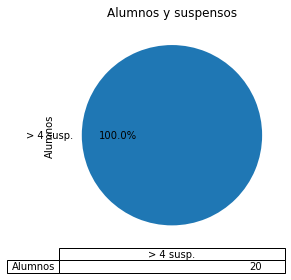

In [61]:
# Alumnos y suspensos

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'
g0=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True)
g0
g0.get_figure().savefig('g0.png')

texto += "\n\n### Resumen de suspensos \n"
texto += "\n \n {} \n".format(df2.to_frame().T.to_markdown())
texto += "\n \n ![](g0.png) \n \n"
df2.to_frame().T

In [62]:
# Alumno-Asignatura-Suspenso
df = actilla_final[(actilla_final.Eval == ultima_evaluacion) & (actilla_final.Suspenso >= 0)][['Alumno','Asignatura','Suspenso']]

# Alumno-Suspenso
df2=df.groupby('Alumno').sum().sort_values('Suspenso', ascending=False)

# Numero Suspenso - Numero alumnos
df3 = df2
df3['N']=1
df3 = df3.groupby('Suspenso').count().sort_index(ascending=False)

display("Alumnos suspensos: \n")

texto += " \n Alumnos con suspensos: \n"
for i in df3[df3.index> 0].index :
    print(f'Con {i} asignatura:')
    texto += "\n* Con {} asignaturas: \n".format(i)
    for j in df2[df2.Suspenso == i].sort_values('Alumno').index : 
        print(" ", j,'(', ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values),')')
        texto += "\n    - "+ j+' ('+ ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values)+") \n \n"


'Alumnos suspensos: \n'

Con 13 asignatura:
  Doncheva Mavrova, Teodora ( CCL, FQ, FQB, FR2, GH, GHB, IN, LE, MU, RC, TC, TIC, VET )
Con 11 asignatura:
  Arcas Sánchez, Daniel ( ARE, CC, CCL, EC, FIL, GHB, IN, INB, MC, RC, TC )
  Sanz Bona, Marcos ( ARE, BG, CCL, ECB, FQ, GH, IN, INB, MC, TC, VET )
Con 10 asignatura:
  Cabeza Roche, Andrea ( ARE, CC, EC, ECB, EF, FQB, IN, PL, RC, TIC )
  Giráldez Vicente, Lucía ( CC, CCL, EF, FIL, FR2, GHB, INB, MC, TC, TIC )
  Raja Herranz, Laura ( ARE, FR2, GH, GHB, INB, MC, MU, RC, TC, TIC )
  Zueras Martínez, Marta ( EC, ECB, EF, FQB, FR2, GH, GHB, MC, PL, TC )
Con 9 asignatura:
  Aparicio Maella, Ángel ( CC, CCL, EF, FIL, FQ, INB, TC, TIC, VET )
  Gómez Izquierdo, María ( CC, FIL, FQ, GH, IN, LE, PL, TC, VET )
  Izquierdo Langarita, Sandra ( CC, EC, ECB, FQB, GH, IN, MC, PL, RC )
  Mateo Trejo, Ada ( ARE, CC, CCL, EC, FIL, FQ, GHB, RC, TIC )
  Morato Sánchez, Juan José ( CC, FQB, GHB, IN, MC, PL, RC, TIC, VET )
  Sánchez Paz, Daniel ( CC, CCL, EF, GHB, MC, PL, TC, TIC, VE

Nota,"[0, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 7)","[7, 9)","[9, 10)"
Alumnos,0,0,3,19,5,0,0


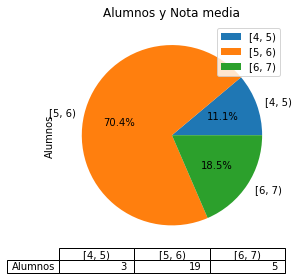

In [63]:
# Alumnos y nota media
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = 'Alumnos'
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True)
g1
g1.get_figure().savefig('g1.png')

texto += "\n\n### Resumen de nota media \n"
texto += "\n {} \n".format(df2.to_frame().T.to_markdown())
texto += "\n\n ![](g1.png) \n \n"
df2.to_frame().T

Eval,1,2,3
Alumno,,,
"Aparicio Maella, Ángel",5.09,5.77,5.45
"Arcas Sánchez, Daniel",6.09,4.73,4.95
"Cabeza Roche, Andrea",6.00,6.39,5.48
"Campo García, Paula",6.30,5.57,6.35
"Damasceno Ossó, Óscar",4.77,5.91,6.86
"Doncheva Mavrova, Teodora",4.96,5.83,4.74
"Escanero Agustín, Sergio",6.32,4.91,6.91
"Espinosa Pérez, David",5.77,5.50,5.73
"Esteban Muñoz, Cora",5.68,4.86,6.50


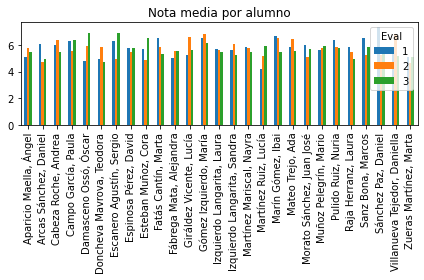

In [64]:
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g2=df.plot.bar(title='Nota media por alumno', xlabel ="") 
g2
g2.get_figure().savefig('g2.png')

texto += "\n\n## Alumnos \n\n"
texto += "\n\n### Notas medias \n\n"
texto += " {} ".format(df.to_markdown())
texto += "\n\n ![](g2.png) \n \n"

df

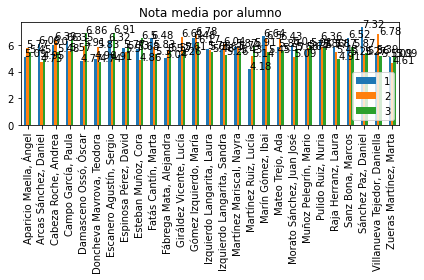

In [65]:
g2 = df.plot(kind='bar', title='Nota media por alumno', xlabel ="")
g2.legend(loc='lower right')

for p in g2.patches:
    g2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

g2.get_figure().savefig('g2.png')

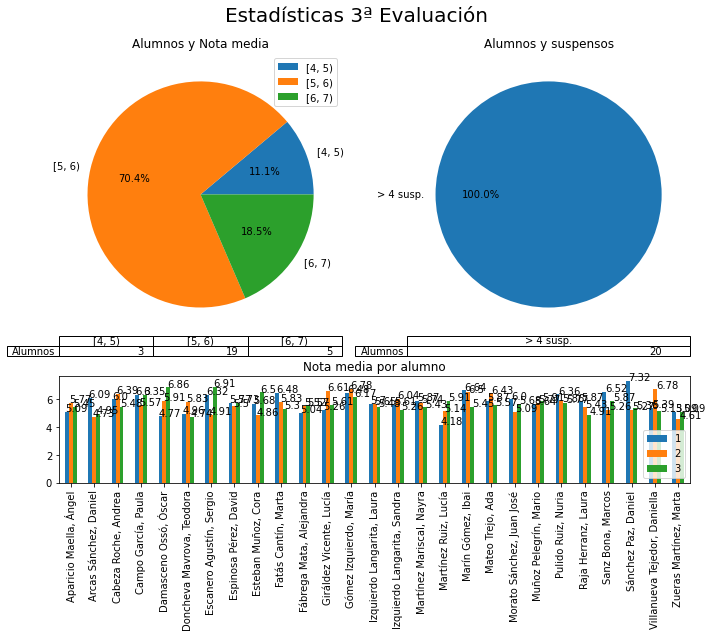

In [66]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 9))
fig.suptitle('Estadísticas {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[3, 1])

ax0 = fig.add_subplot(gs[1, :])
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g3=df.plot.bar(title='Nota media por alumno',ax=ax0, xlabel="")
g3.legend(loc='lower right')
for p in g3.patches:
    g3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
ax1 = fig.add_subplot(gs[0, 0])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = 'Alumnos'
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ax=ax1, ylabel="")

ax2 = fig.add_subplot(gs[0, 1])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'
g4=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True, ax=ax2, ylabel="")

fig.savefig('resumen_{}.png'.format(ultima_evaluacion))

In [67]:
f2 = open("resumen_{}ev.md".format(ultima_evaluacion), "w")
texto = "# Resultados de la {}ª evaluación \n\n".format(ultima_evaluacion)
texto += "\n \n ![](actilla_{}.png) \n \n".format(ultima_evaluacion)
texto += "\newpage"
texto += "\n \n ![](resumen_{}.png)".format(ultima_evaluacion)+" \n \n"
f2.write(texto)
f2.close()

In [68]:
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)

In [69]:
# Resultados por alumno
df = actilla_final[actilla_final.Eval <= ultima_evaluacion]

texto += "\n\n### Resultados por alumno \n"
for a in df.groupby('Alumno').nunique().index :
    
    #Resumen de resultados
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].groupby(['Alumno','Eval']).aggregate({'Nota':'mean','Suspenso':'sum'})
    df2.index = df2.index.get_level_values(1)
    df2.Nota = df2.Nota.round(2)
    df2 = df2.rename(columns={'Nota':'la nota media', 'Suspenso':'el número de suspensos'})
    display(analisis_df(df2, "En la {}ªev: \n ".format(ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    texto += "\n\n#### {} \n".format(a)
    texto += "\n {} \n".format(analisis_df(df2, " {} en la {}ªev: \n ".format(a,ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])

    #Lista de suspensos
    df2 = df[(df.Alumno==a) & (df.Suspenso==1) & (df.Eval == ultima_evaluacion)][['Asignatura','Eval','Suspenso']]
    if len(df2[['Asignatura']].values) > 0 : 
        txt="* Suspende {} asignaturas: ".format(len(df2[['Asignatura']].values)) + ", ".join([i[0] for i in df2[['Asignatura']].values])
        texto += "\n\n{} \n".format(txt)
        print(txt) 

    
    #Análisis de las notas
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].iloc[:,1:-1].groupby(['Asignatura','Eval']).min().unstack('Asignatura')
    df2.columns = df2.columns.get_level_values(1)
    display(df2)
    display(analisis_df(df2, "Por tanto: \n ".format(a), "Sube en {}:", "Baja en {}:", "En {}:", solo_diferencias=True)[0])
    texto += "\n{}\n".format(df2.to_markdown())
    texto +=  analisis_df(df2, "\n\nPor tanto: ".format(a), "Sube en {}:", "**Baja** en {}:", "En {}:", solo_diferencias=True)[0]

texto = texto.replace('|--','|:-').replace('--|','-:|')
f.write(texto)
f.close()


'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 5.77 a 5.45. \n * Mantiene el número de suspensos 9.  \n '

* Suspende 9 asignaturas: CC, CCL, EF, FIL, FQ, INB, TC, TIC, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,8,4,3,1,6,8,2,10,5,1,...,5,1,8,3,1,6,8,9,6,6
2,2,10,9,10,1,7,5,2,8,5,...,1,2,7,4,4,5,10,4,9,10
3,8,4,1,9,8,2,3,1,10,10,...,6,1,5,5,8,9,7,4,3,2


'Por tanto: \n Sube en ARE: Pasa de 2 a 8. Baja en CC: Pasa de 10 a 4. Baja en CCL: Pasa de 9 a 1. Baja en EC: Pasa de 10 a 9. Sube en ECB: Pasa de 1 a 8. Baja en EF: Pasa de 7 a 2. Baja en FIL: Pasa de 5 a 3. Baja en FQ: Pasa de 2 a 1. Sube en FQB: Pasa de 8 a 10. Sube en FR2: Pasa de 5 a 10. Baja en GH: Pasa de 10 a 5. Sube en GHB: Pasa de 2 a 9. Sube en IN: Pasa de 1 a 6. Baja en INB: Pasa de 2 a 1. Baja en LE: Pasa de 7 a 5. Sube en MC: Pasa de 4 a 5. Sube en MU: Pasa de 4 a 8. Sube en PL: Pasa de 5 a 9. Baja en RC: Pasa de 10 a 7. Baja en TIC: Pasa de 9 a 3. Baja en VET: Pasa de 10 a 2.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 4.73 a 4.95. \n * Sube el número de suspensos: Pasa de 10 a 11.  \n '

* Suspende 11 asignaturas: ARE, CC, CCL, EC, FIL, GHB, IN, INB, MC, RC, TC


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,8,7,2,5,8,4,7,10,6,3,...,3,5,5,6,4,6,5,9,7,7
2,4,3,1,1,3,1,8,4,4,7,...,5,5,7,2,6,5,7,10,10,1
3,1,1,3,1,7,10,4,8,6,9,...,3,2,10,3,6,10,1,4,5,7


'Por tanto: \n Baja en ARE: Pasa de 4 a 1. Baja en CC: Pasa de 3 a 1. Sube en CCL: Pasa de 1 a 3. Sube en ECB: Pasa de 3 a 7. Sube en EF: Pasa de 1 a 10. Baja en FIL: Pasa de 8 a 4. Sube en FQ: Pasa de 4 a 8. Sube en FQB: Pasa de 4 a 6. Sube en FR2: Pasa de 7 a 9. Sube en GH: Pasa de 5 a 7. Baja en GHB: Pasa de 5 a 1. Baja en IN: Pasa de 5 a 3. Baja en INB: Pasa de 5 a 2. Sube en LE: Pasa de 7 a 10. Sube en MC: Pasa de 2 a 3. Sube en PL: Pasa de 5 a 10. Baja en RC: Pasa de 7 a 1. Baja en TC: Pasa de 10 a 4. Baja en TIC: Pasa de 10 a 5. Sube en VET: Pasa de 1 a 7.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 6.39 a 5.48. \n * Sube el número de suspensos: Pasa de 5 a 10.  \n '

* Suspende 10 asignaturas: ARE, CC, EC, ECB, EF, FQB, IN, PL, RC, TIC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,9,9,2,9,3,4,10,5,7,5,...,5,7,3,4,1,3,10,7,10,2
2,5,9,7,4,4,10,5,9,8,6,...,8,10,5,9,1,7,6,2,6,8
3,3,9,2,7,2,4,2,9,10,4,...,4,7,8,5,9,1,1,5,4,8


'Por tanto: \n Baja en ARE: Pasa de 5 a 3. Baja en CC: Pasa de 7 a 2. Sube en CCL: Pasa de 4 a 7. Baja en EC: Pasa de 4 a 2. Baja en ECB: Pasa de 10 a 4. Baja en EF: Pasa de 5 a 2. Sube en FQ: Pasa de 8 a 10. Baja en FQB: Pasa de 6 a 4. Baja en FR2: Pasa de 9 a 7. Baja en GH: Pasa de 6 a 5. Sube en GHB: Pasa de 3 a 10. Baja en IN: Pasa de 8 a 4. Baja en INB: Pasa de 10 a 7. Sube en LE: Pasa de 5 a 8. Baja en MC: Pasa de 9 a 5. Sube en MU: Pasa de 1 a 9. Baja en PL: Pasa de 7 a 1. Baja en RC: Pasa de 6 a 1. Sube en TC: Pasa de 2 a 5. Baja en TIC: Pasa de 6 a 4.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.57 a 6.35. \n * **Baja** el número de suspensos: Pasa de 9 a 7.  \n '

* Suspende 7 asignaturas: ARE, CCL, ECB, GHB, INB, MC, TC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,10,7,4,10,6,5,4,9,8,8,...,6,6,8,7,9,10,4,7,2,7
2,10,7,5,2,8,1,1,1,2,3,...,9,5,7,8,9,3,10,4,7,6
3,3,7,10,2,7,4,9,5,10,7,...,9,4,5,4,5,7,10,3,5,8


'Por tanto: \n Baja en ARE: Pasa de 10 a 3. Sube en CC: Pasa de 5 a 10. Baja en EC: Pasa de 8 a 7. Sube en ECB: Pasa de 1 a 4. Sube en EF: Pasa de 1 a 9. Sube en FIL: Pasa de 1 a 5. Sube en FQ: Pasa de 2 a 10. Sube en FQB: Pasa de 3 a 7. Sube en FR2: Pasa de 4 a 9. Sube en GH: Pasa de 7 a 10. Baja en GHB: Pasa de 9 a 3. Baja en INB: Pasa de 5 a 4. Baja en LE: Pasa de 7 a 5. Baja en MC: Pasa de 8 a 4. Baja en MU: Pasa de 9 a 5. Sube en PL: Pasa de 3 a 7. Baja en TC: Pasa de 4 a 3. Baja en TIC: Pasa de 7 a 5. Sube en VET: Pasa de 6 a 8.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.91 a 6.86. \n * **Baja** el número de suspensos: Pasa de 8 a 5.  \n '

* Suspende 5 asignaturas: GH, MC, RC, TC, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,7,5,4,5,2,6,5,4,2,4,...,2,7,1,3,3,10,6,7,10,3
2,1,6,9,10,9,9,1,9,1,2,...,8,3,9,5,2,9,9,2,8,5
3,7,10,8,10,7,6,5,9,10,10,...,5,9,9,1,10,10,2,3,10,2


'Por tanto: \n Sube en ARE: Pasa de 1 a 7. Sube en CC: Pasa de 6 a 10. Baja en CCL: Pasa de 9 a 8. Baja en ECB: Pasa de 9 a 7. Baja en EF: Pasa de 9 a 6. Sube en FIL: Pasa de 1 a 5. Sube en FQB: Pasa de 1 a 10. Sube en FR2: Pasa de 2 a 10. Baja en GH: Pasa de 10 a 3. Sube en GHB: Pasa de 3 a 5. Baja en IN: Pasa de 8 a 5. Sube en INB: Pasa de 3 a 9. Baja en MC: Pasa de 5 a 1. Sube en MU: Pasa de 2 a 10. Sube en PL: Pasa de 9 a 10. Baja en RC: Pasa de 9 a 2. Sube en TC: Pasa de 2 a 3. Sube en TIC: Pasa de 8 a 10. Baja en VET: Pasa de 5 a 2.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 5.83 a 4.74. \n * Sube el número de suspensos: Pasa de 10 a 13.  \n '

* Suspende 13 asignaturas: CCL, FQ, FQB, FR2, GH, GHB, IN, LE, MU, RC, TC, TIC, VET


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,4,7,4,1,6,8,1,1,8,8,...,10,1,10,5,9,6,2,2,4,7
2,9,7,4,4,7,9,9,4,3,9,...,8,4,10,9,8,1,9,1,6,9
3,6,7,7,2,9,10,5,8,1,1,...,4,8,3,8,4,8,2,2,2,3


'Por tanto: \n Baja en ARE: Pasa de 9 a 6. Sube en CC: Pasa de 4 a 7. Baja en CCL: Pasa de 4 a 2. Sube en EC: Pasa de 7 a 9. Sube en ECB: Pasa de 9 a 10. Baja en EF: Pasa de 9 a 5. Sube en FIL: Pasa de 4 a 8. Baja en FQ: Pasa de 3 a 1. Baja en FQB: Pasa de 9 a 1. Sube en FR2: Pasa de 2 a 3. Sube en GH: Pasa de 1 a 3. Sube en GHB: Pasa de 1 a 3. Baja en IN: Pasa de 8 a 4. Sube en INB: Pasa de 4 a 8. Baja en LE: Pasa de 10 a 3. Baja en MC: Pasa de 9 a 8. Baja en MU: Pasa de 8 a 4. Sube en PL: Pasa de 1 a 8. Baja en RC: Pasa de 9 a 2. Sube en TC: Pasa de 1 a 2. Baja en TIC: Pasa de 6 a 2. Baja en VET: Pasa de 9 a 3.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 4.91 a 6.91. \n * **Baja** el número de suspensos: Pasa de 11 a 5.  \n '

* Suspende 5 asignaturas: CC, EC, GHB, MC, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,9,7,9,8,1,10,8,9,2,3,...,10,7,9,10,2,7,4,2,1,10
2,1,6,10,6,10,6,7,9,1,6,...,2,3,1,2,2,10,4,4,5,10
3,6,2,7,2,7,10,10,8,9,10,...,8,7,8,1,9,9,7,9,7,4


'Por tanto: \n Sube en ARE: Pasa de 1 a 6. Baja en CC: Pasa de 6 a 2. Baja en CCL: Pasa de 10 a 7. Baja en EC: Pasa de 6 a 2. Baja en ECB: Pasa de 10 a 7. Sube en EF: Pasa de 6 a 10. Sube en FIL: Pasa de 7 a 10. Baja en FQ: Pasa de 9 a 8. Sube en FQB: Pasa de 1 a 9. Sube en FR2: Pasa de 6 a 10. Sube en GH: Pasa de 2 a 8. Sube en GHB: Pasa de 1 a 4. Sube en IN: Pasa de 2 a 8. Sube en INB: Pasa de 3 a 7. Sube en LE: Pasa de 1 a 8. Baja en MC: Pasa de 2 a 1. Sube en MU: Pasa de 2 a 9. Baja en PL: Pasa de 10 a 9. Sube en RC: Pasa de 4 a 7. Sube en TC: Pasa de 4 a 9. Sube en TIC: Pasa de 5 a 7. Baja en VET: Pasa de 10 a 4.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.5 a 5.73. \n * **Baja** el número de suspensos: Pasa de 9 a 7.  \n '

* Suspende 7 asignaturas: ARE, ECB, FQ, IN, LE, MC, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,7,1,9,4,10,2,9,2,7,3,...,5,9,2,8,8,10,5,9,6,6
2,9,8,6,9,3,1,3,8,4,7,...,10,6,8,1,2,4,9,3,5,3
3,2,7,6,7,3,5,10,1,10,5,...,2,10,1,1,6,7,8,5,9,2


'Por tanto: \n Baja en ARE: Pasa de 9 a 2. Baja en CC: Pasa de 8 a 7. Baja en EC: Pasa de 9 a 7. Sube en EF: Pasa de 1 a 5. Sube en FIL: Pasa de 3 a 10. Baja en FQ: Pasa de 8 a 1. Sube en FQB: Pasa de 4 a 10. Baja en FR2: Pasa de 7 a 5. Sube en GH: Pasa de 5 a 9. Sube en GHB: Pasa de 7 a 10. Baja en IN: Pasa de 10 a 2. Sube en INB: Pasa de 6 a 10. Baja en LE: Pasa de 8 a 1. Sube en MU: Pasa de 2 a 6. Sube en PL: Pasa de 4 a 7. Baja en RC: Pasa de 9 a 8. Sube en TC: Pasa de 3 a 5. Sube en TIC: Pasa de 5 a 9. Baja en VET: Pasa de 3 a 2.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 4.86 a 6.5. \n * **Baja** el número de suspensos: Pasa de 12 a 6.  \n '

* Suspende 6 asignaturas: EF, FQ, FQB, GHB, INB, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,8,6,2,2,5,5,7,10,7,7,...,10,1,6,5,1,5,7,4,6,4
2,3,8,5,10,4,10,5,2,1,7,...,1,3,8,4,1,1,8,2,3,10
3,10,9,7,9,10,4,6,3,2,6,...,7,4,10,7,8,5,10,8,7,2


'Por tanto: \n Sube en ARE: Pasa de 3 a 10. Sube en CC: Pasa de 8 a 9. Sube en CCL: Pasa de 5 a 7. Baja en EC: Pasa de 10 a 9. Sube en ECB: Pasa de 4 a 10. Baja en EF: Pasa de 10 a 4. Sube en FIL: Pasa de 5 a 6. Sube en FQ: Pasa de 2 a 3. Sube en FQB: Pasa de 1 a 2. Baja en FR2: Pasa de 7 a 6. Baja en GH: Pasa de 9 a 6. Sube en GHB: Pasa de 2 a 3. Sube en IN: Pasa de 1 a 7. Sube en INB: Pasa de 3 a 4. Sube en LE: Pasa de 8 a 10. Sube en MC: Pasa de 4 a 7. Sube en MU: Pasa de 1 a 8. Sube en PL: Pasa de 1 a 5. Sube en RC: Pasa de 8 a 10. Sube en TC: Pasa de 2 a 8. Sube en TIC: Pasa de 3 a 7. Baja en VET: Pasa de 10 a 2.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 5.83 a 5.3. \n * Mantiene el número de suspensos 8.  \n '

* Suspende 8 asignaturas: CC, ECB, FIL, FQ, FQB, IN, MC, RC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,9,9,7,4,10,5,9,9,4,2,...,9,9,2,10,3,9,2,5,6,10
2,6,9,1,2,7,1,7,8,2,10,...,4,8,7,8,6,7,1,4,9,7
3,6,9,1,10,5,4,6,3,4,1,...,3,8,6,2,5,5,3,5,8,5


'Por tanto: \n Sube en CCL: Pasa de 2 a 10. Baja en EC: Pasa de 7 a 5. Sube en ECB: Pasa de 1 a 4. Baja en EF: Pasa de 7 a 6. Baja en FIL: Pasa de 8 a 3. Sube en FQ: Pasa de 2 a 4. Baja en FQB: Pasa de 10 a 1. Sube en FR2: Pasa de 3 a 10. Baja en GH: Pasa de 9 a 6. Baja en GHB: Pasa de 8 a 7. Baja en IN: Pasa de 4 a 3. Baja en LE: Pasa de 7 a 6. Baja en MC: Pasa de 8 a 2. Baja en MU: Pasa de 6 a 5. Baja en PL: Pasa de 7 a 5. Sube en RC: Pasa de 1 a 3. Sube en TC: Pasa de 4 a 5. Baja en TIC: Pasa de 9 a 8. Baja en VET: Pasa de 7 a 5.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.52 a 5.57. \n * **Baja** el número de suspensos: Pasa de 11 a 6.  \n '

* Suspende 6 asignaturas: CCL, GH, MU, PL, TIC, VET


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,6,7,9,5,9,7,8,1,10,5,...,3,2,1,5,1,8,7,1,6,3
2,9,7,9,10,10,1,2,1,6,10,...,10,9,2,2,1,4,4,3,6,8
3,5,7,8,4,5,6,6,6,5,7,...,7,7,10,8,2,1,9,7,4,1


'Por tanto: \n Baja en ARE: Pasa de 9 a 5. Baja en CC: Pasa de 9 a 8. Baja en CCL: Pasa de 10 a 4. Baja en EC: Pasa de 10 a 5. Sube en ECB: Pasa de 1 a 6. Sube en EF: Pasa de 2 a 6. Sube en FIL: Pasa de 1 a 6. Baja en FQ: Pasa de 6 a 5. Baja en FQB: Pasa de 10 a 7. Sube en FR2: Pasa de 1 a 5. Baja en GH: Pasa de 8 a 3. Sube en GHB: Pasa de 4 a 5. Baja en IN: Pasa de 10 a 7. Baja en INB: Pasa de 9 a 7. Sube en LE: Pasa de 2 a 10. Sube en MC: Pasa de 2 a 8. Sube en MU: Pasa de 1 a 2. Baja en PL: Pasa de 4 a 1. Sube en RC: Pasa de 4 a 9. Sube en TC: Pasa de 3 a 7. Baja en TIC: Pasa de 6 a 4. Baja en VET: Pasa de 8 a 1.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 6.61 a 5.61. \n * Sube el número de suspensos: Pasa de 3 a 10.  \n '

* Suspende 10 asignaturas: CC, CCL, EF, FIL, FR2, GHB, INB, MC, TC, TIC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,6,7,10,9,6,6,4,2,3,1,...,6,4,1,5,5,7,6,4,5,5
2,8,7,9,6,10,2,5,6,8,2,...,8,8,6,5,9,7,10,5,7,10
3,5,7,2,3,10,9,4,3,9,10,...,9,2,6,4,9,7,5,3,3,7


'Por tanto: \n Baja en ARE: Pasa de 8 a 5. Baja en CC: Pasa de 9 a 2. Baja en CCL: Pasa de 6 a 3. Sube en ECB: Pasa de 2 a 9. Baja en EF: Pasa de 5 a 4. Baja en FIL: Pasa de 6 a 3. Sube en FQ: Pasa de 8 a 9. Sube en FQB: Pasa de 2 a 10. Baja en FR2: Pasa de 5 a 4. Baja en GH: Pasa de 7 a 5. Sube en GHB: Pasa de 2 a 3. Sube en IN: Pasa de 8 a 9. Baja en INB: Pasa de 8 a 2. Baja en MC: Pasa de 5 a 4. Baja en RC: Pasa de 10 a 5. Baja en TC: Pasa de 5 a 3. Baja en TIC: Pasa de 7 a 3. Baja en VET: Pasa de 10 a 7.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 6.78 a 6.17. \n * Sube el número de suspensos: Pasa de 7 a 9.  \n '

* Suspende 9 asignaturas: CC, FIL, FQ, GH, IN, LE, PL, TC, VET


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,1,10,7,4,7,8,7,8,9,6,...,7,7,10,1,9,4,8,2,6,9
2,10,10,5,10,3,7,7,4,8,6,...,4,10,2,3,8,2,10,10,8,8
3,10,10,2,6,8,7,10,1,2,10,...,2,10,4,9,9,3,10,2,10,2


'Por tanto: \n Baja en CC: Pasa de 5 a 2. Baja en CCL: Pasa de 10 a 6. Sube en EC: Pasa de 3 a 8. Sube en EF: Pasa de 7 a 10. Baja en FIL: Pasa de 4 a 1. Baja en FQ: Pasa de 8 a 2. Sube en FQB: Pasa de 6 a 10. Sube en FR2: Pasa de 3 a 6. Baja en GH: Pasa de 9 a 4. Baja en GHB: Pasa de 9 a 5. Baja en IN: Pasa de 4 a 2. Sube en LE: Pasa de 2 a 4. Sube en MC: Pasa de 3 a 9. Sube en MU: Pasa de 8 a 9. Sube en PL: Pasa de 2 a 3. Baja en TC: Pasa de 10 a 2. Sube en TIC: Pasa de 8 a 10. Baja en VET: Pasa de 8 a 2.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 5.65 a 5.48. \n * **Baja** el número de suspensos: Pasa de 10 a 7.  \n '

* Suspende 7 asignaturas: CC, ECB, FIL, GH, MC, MU, VET


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,3,7,2,6,1,10,6,6,3,8,...,10,1,9,3,10,7,2,7,6,10
2,3,7,4,6,2,4,5,9,6,10,...,10,9,3,2,8,6,5,7,2,4
3,10,7,4,5,5,3,6,4,8,9,...,6,6,5,4,2,8,5,9,5,1


'Por tanto: \n Sube en ARE: Pasa de 3 a 10. Baja en CCL: Pasa de 6 a 5. Sube en EC: Pasa de 2 a 5. Baja en ECB: Pasa de 4 a 3. Sube en EF: Pasa de 5 a 6. Baja en FIL: Pasa de 9 a 4. Sube en FQ: Pasa de 6 a 8. Baja en FQB: Pasa de 10 a 9. Sube en FR2: Pasa de 4 a 8. Baja en GH: Pasa de 4 a 1. Baja en GHB: Pasa de 10 a 5. Baja en IN: Pasa de 10 a 6. Baja en INB: Pasa de 9 a 6. Sube en LE: Pasa de 3 a 5. Sube en MC: Pasa de 2 a 4. Baja en MU: Pasa de 8 a 2. Sube en PL: Pasa de 6 a 8. Sube en TC: Pasa de 7 a 9. Sube en TIC: Pasa de 2 a 5. Baja en VET: Pasa de 4 a 1.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 6.04 a 5.26. \n * **Baja** el número de suspensos: Pasa de 10 a 9.  \n '

* Suspende 9 asignaturas: CC, EC, ECB, FQB, GH, IN, MC, PL, RC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,4,7,8,6,5,10,10,7,3,6,...,7,8,3,6,3,8,6,4,2,3
2,5,7,9,3,4,3,4,4,4,8,...,8,2,7,1,8,1,9,10,10,10
3,6,7,3,7,2,3,10,8,7,2,...,1,5,7,1,6,2,3,5,10,6


'Por tanto: \n Sube en ARE: Pasa de 5 a 6. Baja en CC: Pasa de 9 a 3. Sube en CCL: Pasa de 3 a 7. Baja en EC: Pasa de 4 a 2. Sube en EF: Pasa de 4 a 10. Sube en FIL: Pasa de 4 a 8. Sube en FQ: Pasa de 4 a 7. Baja en FQB: Pasa de 8 a 2. Sube en FR2: Pasa de 2 a 7. Baja en GH: Pasa de 10 a 4. Baja en GHB: Pasa de 10 a 9. Baja en IN: Pasa de 8 a 1. Sube en INB: Pasa de 2 a 5. Baja en MU: Pasa de 8 a 6. Sube en PL: Pasa de 1 a 2. Baja en RC: Pasa de 9 a 3. Baja en TC: Pasa de 10 a 5. Baja en VET: Pasa de 10 a 6.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 5.74 a 5.43. \n * **Baja** el número de suspensos: Pasa de 9 a 8.  \n '

* Suspende 8 asignaturas: EC, ECB, FQB, FR2, GH, IN, INB, RC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,5,8,4,5,3,10,8,10,5,5,...,2,4,2,10,3,7,4,10,6,10
2,2,8,3,8,9,5,2,9,1,7,...,3,3,7,3,10,9,10,10,10,5
3,5,8,5,10,3,1,6,7,5,1,...,1,4,8,8,9,5,1,10,7,7


'Por tanto: \n Sube en ARE: Pasa de 2 a 5. Sube en CC: Pasa de 3 a 5. Sube en CCL: Pasa de 8 a 10. Baja en EC: Pasa de 9 a 3. Baja en ECB: Pasa de 5 a 1. Sube en EF: Pasa de 2 a 6. Baja en FIL: Pasa de 9 a 7. Sube en FQ: Pasa de 1 a 5. Baja en FQB: Pasa de 7 a 1. Baja en GH: Pasa de 5 a 4. Sube en GHB: Pasa de 1 a 8. Baja en IN: Pasa de 3 a 1. Sube en INB: Pasa de 3 a 4. Sube en LE: Pasa de 7 a 8. Sube en MC: Pasa de 3 a 8. Baja en MU: Pasa de 10 a 9. Baja en PL: Pasa de 9 a 5. Baja en RC: Pasa de 10 a 1. Baja en TIC: Pasa de 10 a 7. Sube en VET: Pasa de 5 a 7.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.14 a 5.91. \n * **Baja** el número de suspensos: Pasa de 9 a 8.  \n '

* Suspende 8 asignaturas: ARE, FQB, FR2, GH, MC, PL, RC, TC


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,5,4,10,9,1,1,1,1,6,7,...,1,4,9,1,3,2,1,10,1,3
2,5,5,9,4,6,2,9,8,3,7,...,1,4,2,2,1,8,6,8,9,7
3,3,7,8,5,5,10,7,9,1,3,...,9,9,9,1,9,3,2,1,7,9


'Por tanto: \n Baja en ARE: Pasa de 5 a 3. Sube en CC: Pasa de 5 a 7. Baja en CCL: Pasa de 9 a 8. Sube en EC: Pasa de 4 a 5. Baja en ECB: Pasa de 6 a 5. Sube en EF: Pasa de 2 a 10. Baja en FIL: Pasa de 9 a 7. Sube en FQ: Pasa de 8 a 9. Baja en FQB: Pasa de 3 a 1. Baja en FR2: Pasa de 7 a 3. Baja en GH: Pasa de 6 a 4. Sube en GHB: Pasa de 1 a 9. Sube en IN: Pasa de 1 a 9. Sube en INB: Pasa de 4 a 9. Sube en LE: Pasa de 2 a 9. Baja en MC: Pasa de 2 a 1. Sube en MU: Pasa de 1 a 9. Baja en PL: Pasa de 8 a 3. Baja en RC: Pasa de 6 a 2. Baja en TC: Pasa de 8 a 1. Baja en TIC: Pasa de 9 a 7. Sube en VET: Pasa de 7 a 9.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 6.5 a 5.45. \n * Sube el número de suspensos: Pasa de 4 a 8.  \n '

* Suspende 8 asignaturas: ARE, EC, FQ, FR2, GH, IN, MU, RC


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,7,10,10,9,9,8,8,4,3,10,...,7,3,7,5,9,5,3,5,7,2
2,9,9,4,6,5,6,9,5,10,7,...,8,7,3,8,1,5,5,10,5,8
3,1,10,10,4,10,5,7,1,5,1,...,4,6,10,7,4,7,4,6,5,6


'Por tanto: \n Baja en ARE: Pasa de 9 a 1. Sube en CC: Pasa de 9 a 10. Sube en CCL: Pasa de 4 a 10. Baja en EC: Pasa de 6 a 4. Sube en ECB: Pasa de 5 a 10. Baja en EF: Pasa de 6 a 5. Baja en FIL: Pasa de 9 a 7. Baja en FQ: Pasa de 5 a 1. Baja en FQB: Pasa de 10 a 5. Baja en FR2: Pasa de 7 a 1. Baja en GH: Pasa de 10 a 2. Sube en GHB: Pasa de 3 a 5. Baja en IN: Pasa de 8 a 4. Baja en INB: Pasa de 7 a 6. Sube en LE: Pasa de 3 a 10. Baja en MC: Pasa de 8 a 7. Sube en MU: Pasa de 1 a 4. Sube en PL: Pasa de 5 a 7. Baja en RC: Pasa de 5 a 4. Baja en TC: Pasa de 10 a 6. Baja en VET: Pasa de 8 a 6.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 6.43 a 5.57. \n * Sube el número de suspensos: Pasa de 7 a 9.  \n '

* Suspende 9 asignaturas: ARE, CC, CCL, EC, FIL, FQ, GHB, RC, TIC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,7,9,2,6,2,6,9,7,5,9,...,7,6,3,10,8,1,3,6,7,5
2,4,9,3,10,10,10,5,9,1,2,...,1,9,6,5,5,3,8,10,10,7
3,2,9,4,3,3,10,5,4,2,10,...,6,9,5,9,8,6,2,9,1,6


'Por tanto: \n Baja en ARE: Pasa de 4 a 2. Sube en CC: Pasa de 3 a 4. Baja en CCL: Pasa de 10 a 3. Baja en EC: Pasa de 10 a 3. Baja en FIL: Pasa de 9 a 4. Sube en FQ: Pasa de 1 a 2. Sube en FQB: Pasa de 2 a 10. Sube en FR2: Pasa de 4 a 7. Baja en GH: Pasa de 9 a 6. Baja en GHB: Pasa de 8 a 2. Sube en IN: Pasa de 1 a 6. Baja en LE: Pasa de 6 a 5. Sube en MC: Pasa de 5 a 9. Sube en MU: Pasa de 5 a 8. Sube en PL: Pasa de 3 a 6. Baja en RC: Pasa de 8 a 2. Baja en TC: Pasa de 10 a 9. Baja en TIC: Pasa de 10 a 1. Baja en VET: Pasa de 7 a 6.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.09 a 5.68. \n * **Baja** el número de suspensos: Pasa de 12 a 9.  \n '

* Suspende 9 asignaturas: CC, FQB, GHB, IN, MC, PL, RC, TIC, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,5,5,1,5,1,6,7,2,8,8,...,5,3,10,7,8,10,8,3,1,10
2,9,8,3,2,2,9,7,1,2,10,...,6,4,7,7,3,9,3,2,3,9
3,5,3,7,5,9,8,10,10,2,9,...,2,7,6,1,9,1,4,10,4,2


'Por tanto: \n Baja en ARE: Pasa de 9 a 5. Baja en CC: Pasa de 8 a 3. Sube en CCL: Pasa de 3 a 7. Sube en EC: Pasa de 2 a 5. Sube en ECB: Pasa de 2 a 9. Baja en EF: Pasa de 9 a 8. Sube en FIL: Pasa de 7 a 10. Sube en FQ: Pasa de 1 a 10. Baja en FR2: Pasa de 10 a 9. Sube en GH: Pasa de 4 a 9. Baja en IN: Pasa de 6 a 2. Sube en INB: Pasa de 4 a 7. Baja en LE: Pasa de 7 a 6. Baja en MC: Pasa de 7 a 1. Sube en MU: Pasa de 3 a 9. Baja en PL: Pasa de 9 a 1. Sube en RC: Pasa de 3 a 4. Sube en TC: Pasa de 2 a 10. Sube en TIC: Pasa de 3 a 4. Baja en VET: Pasa de 9 a 2.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.77 a 5.91. \n * **Baja** el número de suspensos: Pasa de 9 a 6.  \n '

* Suspende 6 asignaturas: CC, FQB, FR2, GHB, LE, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,3,4,1,2,8,4,5,7,10,10,...,3,8,6,5,6,9,4,4,1,10
2,2,6,8,3,2,9,7,3,5,8,...,3,3,3,10,2,4,7,10,6,10
3,7,1,5,6,5,6,9,7,1,3,...,7,9,4,9,8,10,8,5,10,3


'Por tanto: \n Sube en ARE: Pasa de 2 a 7. Baja en CC: Pasa de 6 a 1. Baja en CCL: Pasa de 8 a 5. Sube en EC: Pasa de 3 a 6. Sube en ECB: Pasa de 2 a 5. Baja en EF: Pasa de 9 a 6. Sube en FIL: Pasa de 7 a 9. Sube en FQ: Pasa de 3 a 7. Baja en FQB: Pasa de 5 a 1. Baja en FR2: Pasa de 8 a 3. Baja en GH: Pasa de 9 a 6. Baja en GHB: Pasa de 7 a 1. Sube en IN: Pasa de 3 a 7. Sube en INB: Pasa de 3 a 9. Sube en LE: Pasa de 3 a 4. Baja en MC: Pasa de 10 a 9. Sube en MU: Pasa de 2 a 8. Sube en PL: Pasa de 4 a 10. Sube en RC: Pasa de 7 a 8. Baja en TC: Pasa de 10 a 5. Sube en TIC: Pasa de 6 a 10. Baja en VET: Pasa de 10 a 3.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 5.86 a 5.77. \n * **Baja** el número de suspensos: Pasa de 8 a 6.  \n '

* Suspende 6 asignaturas: ARE, FIL, IN, INB, RC, TC


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,9,10,9,3,4,2,1,9,9,2,...,2,10,10,9,7,4,8,1,9,10
2,8,2,1,5,4,10,9,7,2,3,...,9,8,6,7,8,10,2,2,3,10
3,3,6,10,7,7,6,1,7,8,5,...,4,1,8,10,5,9,1,3,6,9


'Por tanto: \n Baja en ARE: Pasa de 8 a 3. Sube en CC: Pasa de 2 a 6. Sube en CCL: Pasa de 1 a 10. Sube en EC: Pasa de 5 a 7. Sube en ECB: Pasa de 4 a 7. Baja en EF: Pasa de 10 a 6. Baja en FIL: Pasa de 9 a 1. Sube en FQB: Pasa de 2 a 8. Sube en FR2: Pasa de 3 a 5. Baja en GHB: Pasa de 8 a 6. Baja en IN: Pasa de 9 a 4. Baja en INB: Pasa de 8 a 1. Sube en LE: Pasa de 6 a 8. Sube en MC: Pasa de 7 a 10. Baja en MU: Pasa de 8 a 5. Baja en PL: Pasa de 10 a 9. Baja en RC: Pasa de 2 a 1. Sube en TC: Pasa de 2 a 3. Sube en TIC: Pasa de 3 a 6. Baja en VET: Pasa de 10 a 9.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 5.43 a 4.91. \n * Mantiene el número de suspensos 10.  \n '

* Suspende 10 asignaturas: ARE, FR2, GH, GHB, INB, MC, MU, RC, TC, TIC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,5,9,7,6,7,8,7,5,6,1,...,3,4,3,10,4,5,6,5,5,10
2,5,9,10,7,2,10,9,10,2,2,...,10,4,3,3,1,7,6,7,1,8
3,3,9,5,7,10,6,8,5,7,7,...,6,2,5,4,2,5,2,1,4,7


'Por tanto: \n Baja en ARE: Pasa de 5 a 3. Baja en CC: Pasa de 10 a 5. Sube en EC: Pasa de 2 a 10. Baja en ECB: Pasa de 10 a 6. Baja en EF: Pasa de 9 a 8. Baja en FIL: Pasa de 10 a 5. Sube en FQ: Pasa de 2 a 7. Sube en FQB: Pasa de 2 a 7. Sube en FR2: Pasa de 1 a 3. Baja en GH: Pasa de 2 a 1. Baja en GHB: Pasa de 6 a 4. Baja en IN: Pasa de 10 a 6. Baja en INB: Pasa de 4 a 2. Sube en LE: Pasa de 3 a 5. Sube en MC: Pasa de 3 a 4. Sube en MU: Pasa de 1 a 2. Baja en PL: Pasa de 7 a 5. Baja en RC: Pasa de 6 a 2. Baja en TC: Pasa de 7 a 1. Sube en TIC: Pasa de 1 a 4. Baja en VET: Pasa de 8 a 7.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.26 a 5.87. \n * Mantiene el número de suspensos 11.  \n '

* Suspende 11 asignaturas: ARE, BG, CCL, ECB, FQ, GH, IN, INB, MC, TC, VET


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,4,4,7,7,10,9,5,8,5,3,...,3,5,9,7,10,6,2,10,7,10
2,4,4,9,10,6,5,8,3,8,4,...,6,3,6,4,5,2,4,6,3,4
3,3,4,9,4,6,4,10,9,4,10,...,2,2,9,4,8,9,5,4,9,3


'Por tanto: \n Baja en ARE: Pasa de 4 a 3. Baja en CCL: Pasa de 10 a 4. Baja en ECB: Pasa de 5 a 4. Sube en EF: Pasa de 8 a 10. Sube en FIL: Pasa de 3 a 9. Baja en FQ: Pasa de 8 a 4. Sube en FQB: Pasa de 4 a 10. Sube en FR2: Pasa de 1 a 6. Baja en GH: Pasa de 8 a 2. Sube en GHB: Pasa de 8 a 9. Baja en IN: Pasa de 6 a 2. Baja en INB: Pasa de 3 a 2. Sube en LE: Pasa de 6 a 9. Sube en MU: Pasa de 5 a 8. Sube en PL: Pasa de 2 a 9. Sube en RC: Pasa de 4 a 5. Baja en TC: Pasa de 6 a 4. Sube en TIC: Pasa de 3 a 9. Baja en VET: Pasa de 4 a 3.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 5.27 a 5.36. \n * **Baja** el número de suspensos: Pasa de 10 a 9.  \n '

* Suspende 9 asignaturas: CC, CCL, EF, GHB, MC, PL, TC, TIC, VET


Asignatura,ARE,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,5,7,8,9,2,10,5,6,2,9,...,8,10,7,10,8,6,7,6,10,10
2,8,7,9,3,9,3,4,5,6,7,...,8,8,1,5,2,4,4,7,1,9
3,10,1,2,8,7,1,7,8,8,8,...,7,7,5,4,7,2,8,1,1,4


'Por tanto: \n Sube en ARE: Pasa de 8 a 10. Baja en CC: Pasa de 7 a 1. Baja en CCL: Pasa de 9 a 2. Sube en EC: Pasa de 3 a 8. Baja en ECB: Pasa de 9 a 7. Baja en EF: Pasa de 3 a 1. Sube en FIL: Pasa de 4 a 7. Sube en FQ: Pasa de 5 a 8. Sube en FQB: Pasa de 6 a 8. Sube en FR2: Pasa de 7 a 8. Sube en GH: Pasa de 2 a 9. Baja en GHB: Pasa de 4 a 3. Baja en IN: Pasa de 8 a 7. Baja en INB: Pasa de 8 a 7. Sube en LE: Pasa de 1 a 5. Baja en MC: Pasa de 5 a 4. Sube en MU: Pasa de 2 a 7. Baja en PL: Pasa de 4 a 2. Sube en RC: Pasa de 4 a 8. Baja en TC: Pasa de 7 a 1. Baja en VET: Pasa de 9 a 4.  \n '

'En la 3ªev: \n \n * **Baja** la nota media: Pasa de 6.78 a 5.13. \n * Sube el número de suspensos: Pasa de 5 a 9.  \n '

* Suspende 9 asignaturas: ARE, EC, ECB, FIL, GHB, MC, RC, TIC, VET


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,5,7,1,3,10,9,7,6,10,4,...,4,9,4,9,7,2,10,2,6,5
2,10,7,3,8,10,5,8,7,5,5,...,8,9,6,9,9,4,10,2,8,9
3,4,7,8,5,2,3,5,1,5,8,...,5,7,6,2,5,7,4,6,3,4


'Por tanto: \n Baja en ARE: Pasa de 10 a 4. Sube en CC: Pasa de 3 a 8. Baja en CCL: Pasa de 8 a 5. Baja en EC: Pasa de 10 a 2. Baja en ECB: Pasa de 5 a 3. Baja en EF: Pasa de 8 a 5. Baja en FIL: Pasa de 7 a 1. Sube en FQB: Pasa de 5 a 8. Sube en FR2: Pasa de 1 a 10. Baja en GH: Pasa de 10 a 8. Baja en IN: Pasa de 8 a 5. Baja en INB: Pasa de 9 a 7. Baja en MC: Pasa de 9 a 2. Baja en MU: Pasa de 9 a 5. Sube en PL: Pasa de 4 a 7. Baja en RC: Pasa de 10 a 4. Sube en TC: Pasa de 2 a 6. Baja en TIC: Pasa de 8 a 3. Baja en VET: Pasa de 9 a 4.  \n '

'En la 3ªev: \n \n * Sube la nota media: Pasa de 4.61 a 5.09. \n * **Baja** el número de suspensos: Pasa de 13 a 10.  \n '

* Suspende 10 asignaturas: EC, ECB, EF, FQB, FR2, GH, GHB, MC, PL, TC


Asignatura,ARE,BG,CC,CCL,EC,ECB,EF,FIL,FQ,FQB,...,IN,INB,LE,MC,MU,PL,RC,TC,TIC,VET
Eval,,,,,,,,,,,,,,,,,,,,,
1,3,8,4,5,8,8,7,2,2,6,...,4,10,1,6,5,6,5,1,3,5
2,9,8,5,4,3,10,2,9,9,2,...,3,1,5,1,3,3,6,4,1,1
3,6,8,7,10,4,1,4,7,8,3,...,5,6,7,4,6,1,6,4,5,5


'Por tanto: \n Baja en ARE: Pasa de 9 a 6. Sube en CC: Pasa de 5 a 7. Sube en CCL: Pasa de 4 a 10. Sube en EC: Pasa de 3 a 4. Baja en ECB: Pasa de 10 a 1. Sube en EF: Pasa de 2 a 4. Baja en FIL: Pasa de 9 a 7. Baja en FQ: Pasa de 9 a 8. Sube en FQB: Pasa de 2 a 3. Baja en FR2: Pasa de 9 a 4. Sube en GH: Pasa de 2 a 4. Baja en GHB: Pasa de 6 a 2. Sube en IN: Pasa de 3 a 5. Sube en INB: Pasa de 1 a 6. Sube en LE: Pasa de 5 a 7. Sube en MC: Pasa de 1 a 4. Sube en MU: Pasa de 3 a 6. Baja en PL: Pasa de 3 a 1. Sube en TIC: Pasa de 1 a 5. Sube en VET: Pasa de 1 a 5.  \n '